In [1]:
from signal_utils import *

In [53]:
# Taylor delay parameters

k3 = np.array([0.5, 0.0, -0.5])
k5 = np.array([-1, 8, 0, -8, +1]) / 12.0
k7 = np.array([1, -9, +45, 0, -45, +9, -1]) / 60.0
k9 = np.array([-1, 12, -39, +56, 0, -56, +39, -12, +1]) / 280.0
kernel = k5

# Serialization (LUT) parameters
LUT = [LUT1, LUT2, LUT3, LUT4, LUT5]
n_lut = len(LUT)
lut_width = np.array([len(l[0]) for l in LUT])

# Interpolation parameters
OSR = 8
AdB_interpolation = 80

print(f"OSR = {OSR}")
print(f"AdB_interpolation = {AdB_interpolation}\n")

print(f"n_lut = {n_lut}")
print(f"lut_width = {lut_width}")

OSR = 8
AdB_interpolation = 80

n_lut = 5
lut_width = [16 32 32 15 19]


# Test Signal

Fmax = 0.425


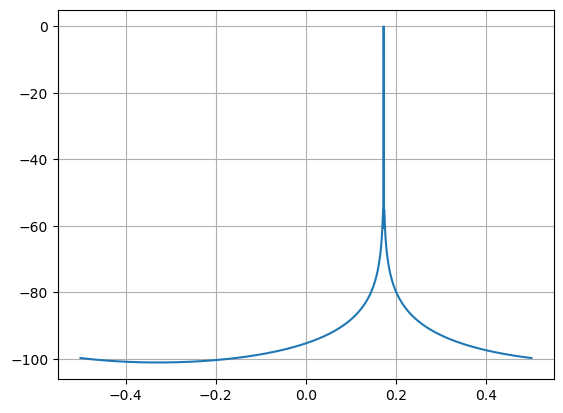

In [54]:
N = 2**12
n = np.arange(N)

perc = 0.15
Fmax = 0.5 * (1 - perc)
print(f"Fmax = {Fmax}")

F = 0.1721

x = 1.0 * np.exp(1j * 2*np.pi*F*n)
xi = x.real
xq = x.imag

plotdB(x, True)

# Delay Filter
## Taylor 1st order aproximation

Sto je faktor povecanja frekvencije odabiranja veci, to je razlika izmedju zakasnjenog i nezakasnjenog signala manja.

Sta to znaci? To znaci da ce IR biti vece i bez kasnjenja.

Ono sto je mana jeste da je potrebanm brzi hardver...

0


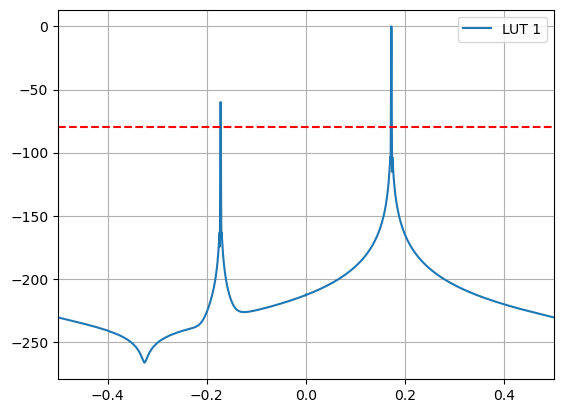

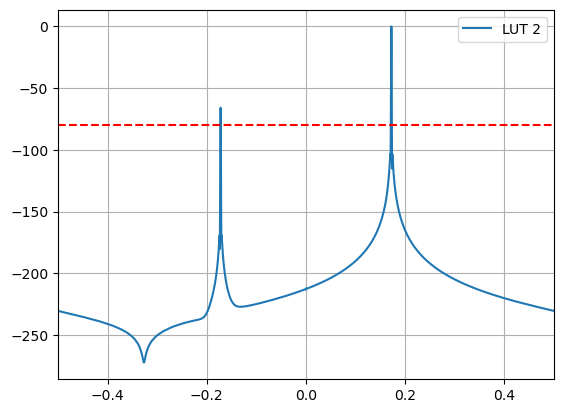

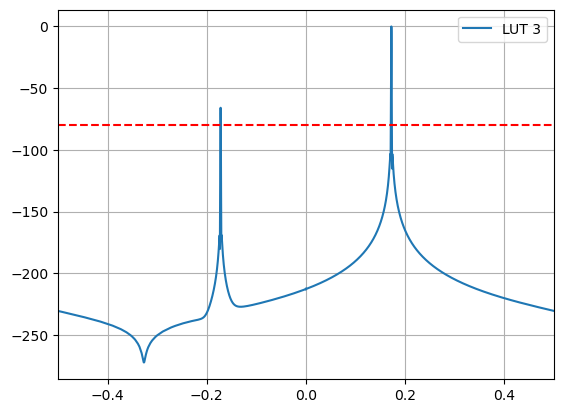

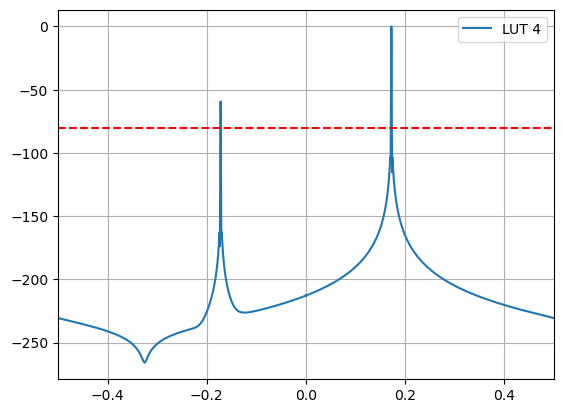

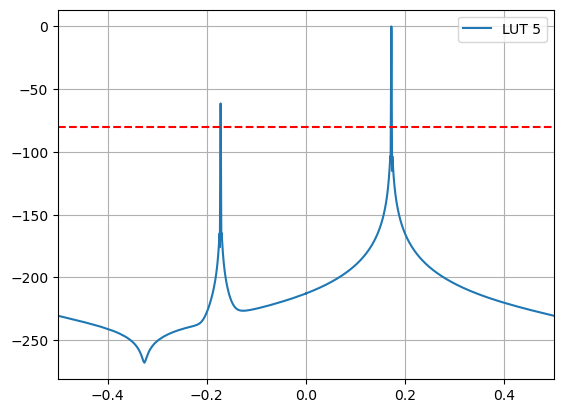

In [55]:
# Taylor 1st Order Delay
i_delta = 1/8 * 1/lut_width * 1/OSR
q_delta = -1/8 * 1/lut_width * 1/OSR

x_delay = []
print(len(x_delay))
cnt = 0
for id_, qd_ in zip(i_delta, q_delta):
    xid = frac_delay_1st(xi, id_, kernel)
    xqd = frac_delay_1st(xq, qd_, kernel)
    xd = xid + 1j*xqd
    x_delay.append(xd)

for i, xd in enumerate(x_delay):
    freqs_, xfftdB_, angle_ = fftdB(xd)
    xmin = -0.5
    xmax = 0.5
    plt.plot(freqs_, xfftdB_, label=f"LUT {i+1}")
    plt.plot([xmin, xmax], [-AdB_interpolation, -AdB_interpolation], '--r')
    plt.legend()
    plt.xlim([xmin, xmax])
    plt.grid()
    plt.show();

# Interpolation

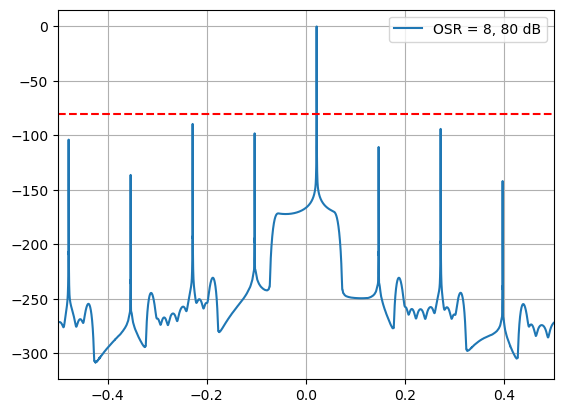

In [6]:
deltaPass = 10**(-AdB_interpolation/20)
deltaStop = deltaPass

F = [Fmax, 1-Fmax]
delta = [deltaPass, deltaStop]

# Interpolation by a factor of 8
xr_osr8 = np.real(interpolate(xr, OSR, F, delta, show=False, prt=False))
xi_osr8 = np.real(interpolate(xi, OSR, F, delta, show=False, prt=False))
x_osr8 = xr_osr8 + 1j*xi_osr8

freqs_osr8, xfftdB_osr8, angle_osr8 = fftdB(x_osr8)
xmin = -0.5
xmax = 0.5
plt.plot(freqs_osr8, xfftdB_osr8, label=f"OSR = {OSR}, {AdB_interpolation} dB")
plt.plot([xmin, xmax], [-AdB_interpolation, -AdB_interpolation], '--r')
plt.legend()
plt.xlim([xmin, xmax])
plt.grid()
plt.show();

# Delay Filter
## Taylor 1st order aproximation

In [8]:
AdB_delay = 80
deltaPass = 10**(-AdB_delay/20)
deltaStop = deltaPass

I = 4
Fpass = Fmax / I
Fstop = (1 - Fmax) / I